## ARIMA Model

In [16]:
import pandas as pd
import numpy as np
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

In [2]:
df = pd.read_csv(r"C:\Users\MsK_PC\360digiTMG\Data_Science\DS_TMT_Steel_Project\Client_data\12mm.csv")

In [3]:
df= df.drop(['t','t_square','log_Quantity','April','August','December','February','January','July','June','March','May','November','October','September'], axis=1)

In [4]:
df

,Date,dia,Quantity,Rate,Value
0,2017-04-03,12 MM,1.93,41200.00,79516.0
1,2017-04-04,12 MM,10.19,37976.19,555690.0
2,2017-04-06,12 MM,10.19,41500.00,555690.0
3,2017-04-06,12 MM,3.03,41000.00,124230.0
4,2017-04-07,12 MM,5.15,40800.00,210120.0
...,...,...,...,...,...
6552,2023-03-07,12 MM,9.98,61950.00,555690.0
6553,2023-03-10,12 MM,10.19,63200.00,555690.0
6554,2023-03-23,12 MM,2.09,60400.00,126236.0
6555,2023-03-25,12 MM,8.66,60000.00,519600.0


In [5]:
# Data Partition
#Train = df.head(6545)
#Test = df.tail(12)

# Data Partition
Train = df.iloc[:len(df)-365]
Test = df.iloc[len(df)-365:]



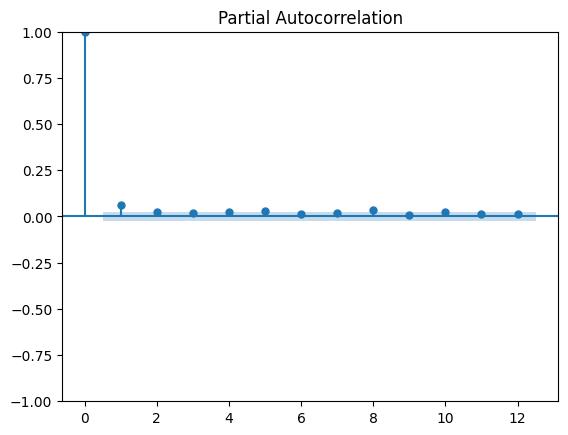

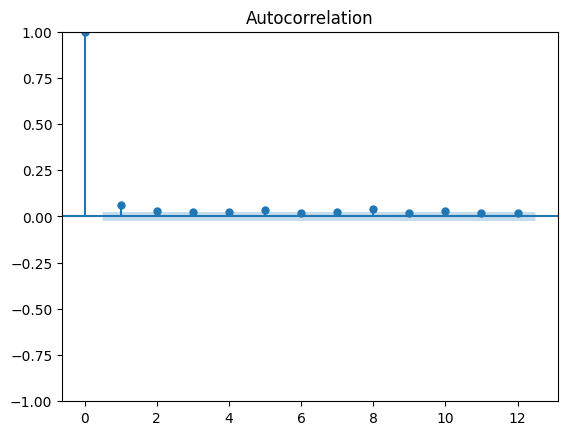

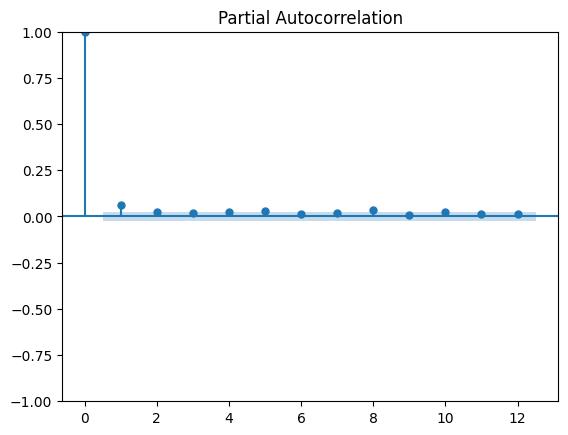

In [6]:
tsa_plots.plot_acf(df.Quantity, lags = 12)
tsa_plots.plot_pacf(df.Quantity, lags = 12)




In [7]:
# ARIMA with AR = 12, MA = 6
model1 = ARIMA(Train.Quantity, order = (12, 2, 3))
res1 = model1.fit()
print(res1.summary())


C:\Users\MsK_PC\anaconda3\envs\DS\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MsK_PC\anaconda3\envs\DS\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                 6192
Model:                ARIMA(12, 2, 3)   Log Likelihood              -15938.945
Date:                Tue, 05 Sep 2023   AIC                          31909.890
Time:                        08:39:58   BIC                          32017.581
Sample:                             0   HQIC                         31947.229
                               - 6192                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.4984      0.107    -23.370      0.000      -2.708      -2.289
ar.L2         -3.0343      0.194    -15.673      0.000      -3.414      -2.655
ar.L3         -2.6957      0.174    -15.525      0.0

In [8]:
# Forecast for next 365 days
start_index = len(Train)
start_index
end_index = start_index + 364
forecast_test = res1.predict(start = start_index, end = end_index)

print(forecast_test)


6192    5.463375
6193    5.472955
6194    5.661706
6195    5.464771
6196    5.589777
          ...   
6552    6.115040
6553    6.115268
6554    6.115496
6555    6.115724
6556    6.115951
Name: predicted_mean, Length: 365, dtype: float64


In [9]:
# Evaluate forecasts
rmse_test = sqrt(mean_squared_error(Test.Quantity, forecast_test))
print('Test RMSE: %.3f' % rmse_test)



Test RMSE: 3.732


In [10]:
Test.Quantity

6192     3.69
6193     3.00
6194     4.98
6195     5.03
6196    10.19
        ...  
6552     9.98
6553    10.19
6554     2.09
6555     8.66
6556    -3.01
Name: Quantity, Length: 365, dtype: float64

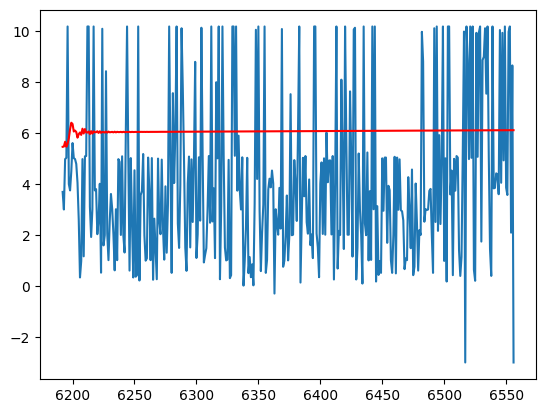

In [11]:
# plot forecasts against actual outcomes
pyplot.plot(Test.Quantity)
pyplot.plot(forecast_test, color = 'red')
pyplot.show()




In [12]:
# Auto-ARIMA - Automatically discover the optimal order for an ARIMA model.
# pip install pmdarima --user
import pmdarima as pm

#help(pm.auto_arima)

ar_model = pm.auto_arima(Train.Quantity, start_p = 0, start_q = 0,
                      max_p = 3, max_q = 3, # maximum p and q
                      m = 12,              # frequency of series
                      d = None,           # let model determine 'd'
                      seasonal = True,   # Seasonality
                      start_P = 0, trace = True,
                      error_action = 'warn', stepwise = True)




Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=35382.686, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=35380.724, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=33755.957, Time=1.97 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=4.97 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=35378.725, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=33754.117, Time=0.43 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=33755.961, Time=1.55 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=33756.665, Time=6.99 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=33084.912, Time=0.68 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=33086.777, Time=2.31 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=33086.780, Time=1.61 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=33088.775, Time=2.66 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=32703.188, Time=0.84 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=32704.287, Time=2.68 sec
 ARIMA(3,1,

In [13]:
# Best Parameters ARIMA
model = ARIMA(Train.Quantity, order = (22, 1, 6))
res = model.fit()
print(res.summary())




C:\Users\MsK_PC\anaconda3\envs\DS\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\MsK_PC\anaconda3\envs\DS\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                 6192
Model:                ARIMA(22, 1, 6)   Log Likelihood              -15829.346
Date:                Tue, 05 Sep 2023   AIC                          31716.692
Time:                        08:49:06   BIC                          31911.887
Sample:                             0   HQIC                         31784.370
                               - 6192                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4727      0.222     -6.632      0.000      -1.908      -1.037
ar.L2         -0.5814      0.173     -3.368      0.001      -0.920      -0.243
ar.L3          0.9430      0.056     16.782      0.0

In [14]:
# Forecast for next 365 days
start_index = len(Train)
end_index = start_index + 364
forecast_best = res.predict(start = start_index, end = end_index)


print(forecast_best)



6192    4.843715
6193    4.686398
6194    4.860765
6195    5.241058
6196    5.686146
          ...   
6552    5.453466
6553    5.410735
6554    5.373462
6555    5.342408
6556    5.318537
Name: predicted_mean, Length: 365, dtype: float64


Test RMSE: 3.521


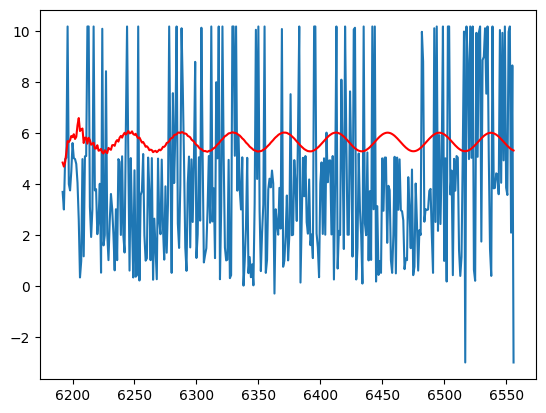

In [23]:
# Evaluate forecasts
rmse_best = np.sqrt(mean_squared_error(Test.Quantity, forecast_best))
print('Test RMSE: %.3f' % rmse_best)

# plot forecasts against actual outcomes
pyplot.plot(Test.Quantity)
pyplot.plot(forecast_best, color = 'red')
pyplot.show()




In [33]:
# MAPE Value
mape = np.mean(np.abs((Test.Quantity - forecast_best) / Test.Quantity))
print('MAPE: %.3f' % mape)


MAPE: 5.183


In [18]:
from scipy.stats import ks_2samp
# Calculate Kolmogorov-Smirnov statistic for model drift detection
ks_statistic, ks_p_value = ks_2samp(Test['Quantity'], forecast_best)

# Define a threshold for significance level
threshold = 0.05

# Check for model drift based on p-value
model_drift_detected = ks_p_value < threshold
# Display model drift detection result
print("Model Drift Detected:", model_drift_detected)

Model Drift Detected: True


In [26]:
df2 = pd.read_csv(r"C:\Users\MsK_PC\360digiTMG\Data_Science\DS_TMT_Steel_Project\Client_data\Deployment\forecasted_results.csv")

In [28]:


# Assuming two DataFrames: 'historic_data' and 'forecasted_data'
# Each DataFrame should have a 'Quantity' column

# Calculate KS statistic between historic and forecasted quantities
ks_statistic, _ = ks_2samp(df['Date'], df2['Date'])

# Set a threshold for significant drift
threshold = 0.05

# Check if there is significant data drift
if ks_statistic > threshold:
    print("Data drift detected!")
else:
    print("No significant data drift.")


Data drift detected!


In [29]:
ks_statistic

0.6557377049180327